In [1]:
from modules import utility
import numpy as np
import matplotlib.pyplot as plt
import tables

Using TensorFlow backend.


In [2]:
from skimage.measure import grid_points_in_poly

In [26]:
f = tables.open_file('/media/marsdenlab/Data2/datasets/DeepLofting/test_192_mr_i2i3d.hdf5')

In [27]:
ypred = f.root.X
truth = f.root.Y
print ypred.shape
print truth.shape
N = truth.shape[0]

(21956, 192, 192, 1)
(21956, 192, 192, 1)


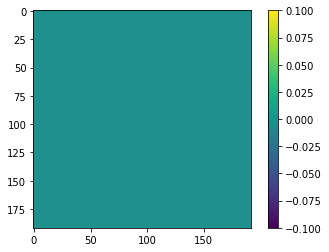

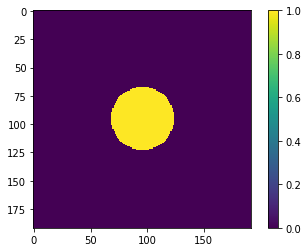

In [43]:
N = ypred.shape[0]
i = np.random.randint(N)
plt.figure()
plt.imshow(ypred[i,:,:,0].astype(float))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(truth[i,:,:,0].astype(float))
plt.colorbar()
plt.show()

In [3]:
help(grid_points_in_poly)

Help on function grid_points_in_poly in module skimage.measure.pnpoly:

grid_points_in_poly(shape, verts)
    Test whether points on a specified grid are inside a polygon.
    
    For each ``(r, c)`` coordinate on a grid, i.e. ``(0, 0)``, ``(0, 1)`` etc.,
    test whether that point lies inside a polygon.
    
    Parameters
    ----------
    shape : tuple (M, N)
        Shape of the grid.
    verts : (V, 2) array
        Specify the V vertices of the polygon, sorted either clockwise
        or anti-clockwise. The first point may (but does not need to be)
        duplicated.
    
    See Also
    --------
    points_in_poly
    
    Returns
    -------
    mask : (M, N) ndarray of bool
        True where the grid falls inside the polygon.



In [4]:
test = np.zeros((100,100))
origin = np.asarray([50,50])
spacing = np.asarray([0.2,0.4])
origin_sp = origin*spacing
R = 20

for i in range(100):
    for j in range(100):
        if (i-origin[0])**2+(j-origin[1])**2 <= R**2:
            test[i,j] = 1

In [5]:
x = np.arange(-R,R,R/10)
points = []

for p in x:
    z = np.sqrt(R**2-p**2)
    the_point = origin+np.asarray([p,z])
    points.append(the_point)
    
for p in np.flip(x,axis=0):
    z = -np.sqrt(R**2-p**2)
    the_point = origin+np.asarray([p,z])
    points.append(the_point)
    
points = np.asarray(points)
points_sp = (points)*spacing
print points.shape
print points_sp.shape
print points

(40, 2)
(40, 2)
[[ 30.          50.        ]
 [ 32.          58.71779789]
 [ 34.          62.        ]
 [ 36.          64.28285686]
 [ 38.          66.        ]
 [ 40.          67.32050808]
 [ 42.          68.33030278]
 [ 44.          69.07878403]
 [ 46.          69.59591794]
 [ 48.          69.89974874]
 [ 50.          70.        ]
 [ 52.          69.89974874]
 [ 54.          69.59591794]
 [ 56.          69.07878403]
 [ 58.          68.33030278]
 [ 60.          67.32050808]
 [ 62.          66.        ]
 [ 64.          64.28285686]
 [ 66.          62.        ]
 [ 68.          58.71779789]
 [ 68.          41.28220211]
 [ 66.          38.        ]
 [ 64.          35.71714314]
 [ 62.          34.        ]
 [ 60.          32.67949192]
 [ 58.          31.66969722]
 [ 56.          30.92121597]
 [ 54.          30.40408206]
 [ 52.          30.10025126]
 [ 50.          30.        ]
 [ 48.          30.10025126]
 [ 46.          30.40408206]
 [ 44.          30.92121597]
 [ 42.          31.66969722

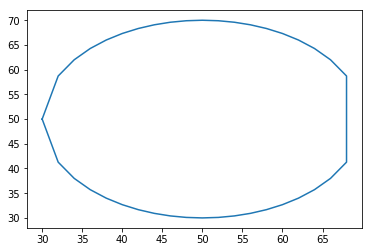

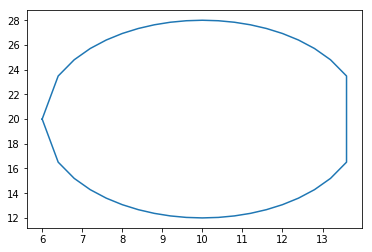

In [6]:
plt.figure()
plt.plot(points[:,0],points[:,1])
plt.show()


plt.figure()
plt.plot(points_sp[:,0],points_sp[:,1])
plt.show()

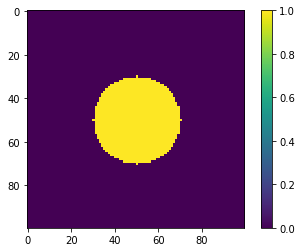

In [7]:
plt.figure()
plt.imshow(test)
plt.colorbar()
plt.show()

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


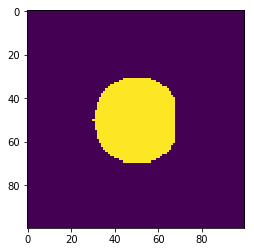

In [8]:
a = grid_points_in_poly((100,100),points)
print a
plt.figure()
plt.imshow(a.T)
plt.show()

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


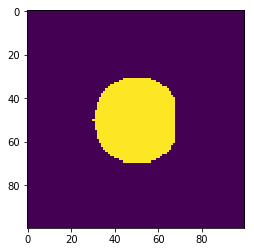

In [9]:
a = grid_points_in_poly((100,100),(points_sp-origin_sp)/spacing+origin)
print a
plt.figure()
plt.imshow(a.T)
plt.show()

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


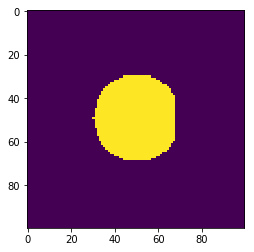

In [10]:
a = utility.contourToSeg(points_sp,origin_sp,[100,100],spacing)
print a
plt.figure()
plt.imshow(a)
plt.show()

In [11]:
%time a = grid_points_in_poly((100,100),(points_sp+origin_sp)/spacing)
%time a = utility.contourToSeg(points_sp,[-50*spacing[0],50*spacing[1]],[100,100],spacing)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.48 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.86 ms


In [12]:
c = np.asarray([[ -8.98388766e-01,  -1.28315470e-07],
 [ -8.67256414e-01,  -2.81788701e-01],
 [ -7.51383858e-01,  -5.45912263e-01],
 [ -5.44845459e-01,  -7.49915437e-01],
 [ -2.78937151e-01,  -8.58480096e-01],
 [  3.26135934e-08,  -8.81142453e-01],
 [  2.70534690e-01,  -8.32620284e-01],
 [  5.16821397e-01,  -7.11343366e-01],
 [  7.18170331e-01,  -5.21781504e-01],
 [  8.59788283e-01,  -2.79362130e-01],
 [  9.20418118e-01,   7.75606139e-09],
 [  8.71664494e-01,   2.83220899e-01],
 [  7.26578636e-01,   5.27890327e-01],
 [  5.24586178e-01,   7.22030974e-01],
 [  2.79195504e-01,   8.59275404e-01],
 [  2.97138169e-08,   9.07780912e-01],
 [ -2.76339158e-01,   8.50484304e-01],
 [ -5.18927666e-01  , 7.14242669e-01],
 [ -7.15722977e-01 ,  5.20003280e-01],
 [ -8.48111643e-01,   2.75568177e-01]])

spacing = (0.03867189958691597, 0.03867189958691597, 0.03867189958691597)

In [13]:
b = utility.contourToSeg(c,[0.0,0.0],[192,192],spacing)

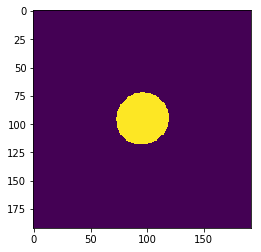

In [14]:
plt.figure()
plt.imshow(b)
plt.show()

In [6]:
import numpy as np
X = np.random.randn(1000,100,100,1)
Y = X.astype(int)

In [8]:
%timeit a = X.astype(int)
%timeit a = Y.astype(float)
%timeit 1.0*Y

1 loop, best of 3: 200 ms per loop
1 loop, best of 3: 201 ms per loop
1 loop, best of 3: 217 ms per loop
